In [1]:
import pandas as pd
import numpy as np

def load_data(file_path, sheet_name):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    A = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
    C = df[['Payment (Rs)']].values
    return A, C

def get_dimensionality(A):
    return A.shape[1]

def get_number_of_vectors(A):
    return A.shape[0]

def get_rank(A):
    return np.linalg.matrix_rank(A)

def get_cost_per_product(A, C):
    A_pinv = np.linalg.pinv(A)
    return np.dot(A_pinv, C)

file_path = 'D:\\Lab_Session_Data.xlsx'
sheet_name = 'Purchase data'

A, C = load_data(file_path, sheet_name)

dimensionality = get_dimensionality(A)
num_vectors = get_number_of_vectors(A)
rank_A = get_rank(A)
cost_per_product = get_cost_per_product(A, C)

print("Dimensionality of the Vector Space:", dimensionality)
print("Number of Vectors in the Vector Space:", num_vectors)
print("Rank of Matrix A:", rank_A)
print("Cost of Each Product:")
print("Candies:", cost_per_product[0, 0])
print("Mangoes:", cost_per_product[1, 0])
print("Milk Packets:", cost_per_product[2, 0])


Dimensionality of the Vector Space: 3
Number of Vectors in the Vector Space: 10
Rank of Matrix A: 3
Cost of Each Product:
Candies: 1.0000000000000027
Mangoes: 55.0
Milk Packets: 17.99999999999999


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

file_path = 'D:/Lab Session Data.xlsx'
xls = pd.ExcelFile(file_path)

purchase_data = pd.read_excel(file_path, sheet_name='Purchase data')

purchase_data_cleaned = purchase_data[['Customer', 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']]
purchase_data_cleaned = purchase_data_cleaned.dropna(subset=['Customer', 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)'])

purchase_data_cleaned['Category'] = purchase_data_cleaned['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')

X = purchase_data_cleaned[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
y = purchase_data_cleaned['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[1 0]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

        POOR       0.50      1.00      0.67         1
        RICH       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\sasic\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sasic\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sasic\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Mean Price: 1560.663453815261
Variance Price: 58732.365352539186
Mean Price on Wednesdays: 1550.706
Mean Price in April: 1698.9526315789474
Probability of making a loss: 0.4979919678714859
Probability of making a profit on Wednesday: 0.42
Conditional probability of making a profit given it's Wednesday: 0.42


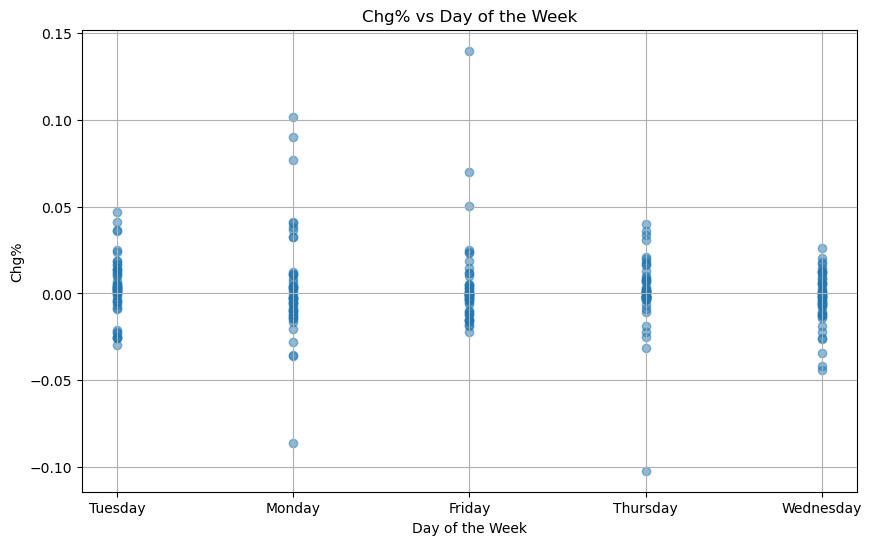

In [7]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt

file_path = 'D:/Lab Session Data.xlsx'
xls = pd.ExcelFile(file_path)
stock_data = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

def calculate_mean_variance(data):
    mean_price = statistics.mean(data)
    variance_price = statistics.variance(data)
    return mean_price, variance_price

def mean_for_wednesdays(data):
    wednesday_data = data[data['Date'].dt.day_name() == 'Wednesday']
    mean_wednesday = statistics.mean(wednesday_data['Price'])
    return mean_wednesda
def mean_for_april(data):
    april_data = data[data['Date'].dt.month == 4]
    mean_april = statistics.mean(april_data['Price'])
    return mean_april

def probability_of_loss(data):
    losses = data['Chg%'].apply(lambda x: x < 0)
    probability_loss = losses.mean()
    return probability_loss
    
def probability_of_profit_on_wednesday(data):
    wednesday_data = data[data['Date'].dt.day_name() == 'Wednesday']
    profits = wednesday_data['Chg%'].apply(lambda x: x > 0)
    probability_profit_wednesday = profits.mean()
    return probability_profit_wednesday

def conditional_probability_of_profit_given_wednesday(data):
    wednesday_data = data[data['Date'].dt.day_name() == 'Wednesday']
    profits = wednesday_data['Chg%'].apply(lambda x: x > 0)
    conditional_probability = profits.mean()
    return conditional_probability
    
def scatter_plot_chg_vs_day_of_week(data):
    data['Day of Week'] = data['Date'].dt.day_name()
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Day of Week'], data['Chg%'], alpha=0.5)
    plt.xlabel('Day of the Week')
    plt.ylabel('Chg%')
    plt.title('Chg% vs Day of the Week')
    plt.grid(True)
    plt.show()

mean_price, variance_price = calculate_mean_variance(stock_data['Price'])
print(f"Mean Price: {mean_price}")
print(f"Variance Price: {variance_price}")

mean_wednesday = mean_for_wednesdays(stock_data)
print(f"Mean Price on Wednesdays: {mean_wednesday}")

mean_april = mean_for_april(stock_data)
print(f"Mean Price in April: {mean_april}")

probability_loss = probability_of_loss(stock_data)
print(f"Probability of making a loss: {probability_loss}")

probability_profit_wednesday = probability_of_profit_on_wednesday(stock_data)
print(f"Probability of making a profit on Wednesday: {probability_profit_wednesday}")

conditional_probability_profit_wednesday = conditional_probability_of_profit_given_wednesday(stock_data)
print(f"Conditional probability of making a profit given it's Wednesday: {conditional_probability_profit_wednesday}")

scatter_plot_chg_vs_day_of_week(stock_data)


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

file_path = 'D:/Lab Session Data.xlsx'
xls = pd.ExcelFile(file_path)

thyroid_data = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

def ensure_string_format(data):
    categorical_cols = data.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        data[col] = data[col].astype(str)
    return data

def identify_datatypes(data):
    datatypes = data.dtypes
    return datatypes

def encode_categorical(data):
    data = ensure_string_format(data)
    categorical_cols = data.select_dtypes(include=['object']).columns
    label_encoders = {}
    onehot_encoders = {}
    
    for col in categorical_cols:
        if data[col].nunique() <= 10:
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col].astype(str))
            label_encoders[col] = le
        else:
            ohe = OneHotEncoder(sparse_output=False, drop='first')
            encoded = ohe.fit_transform(data[[col]])
            encoded_df = pd.DataFrame(encoded, columns=[f"{col}_{cat}" for cat in ohe.categories_[0][1:]])
            data = pd.concat([data, encoded_df], axis=1).drop(columns=[col])
            onehot_encoders[col] = ohe
    
    return data, label_encoders, onehot_encoders

def data_range(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    ranges = data[numeric_cols].agg([np.min, np.max])
    return ranges

def missing_values(data):
    missing = data.isnull().sum()
    return missing

def detect_outliers(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    outliers = {}
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_condition = (data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))
        outliers[col] = data[col][outlier_condition].count()
    return outliers

def calculate_stats(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    means = data[numeric_cols].mean()
    variances = data[numeric_cols].var()
    return means, variances

datatypes = identify_datatypes(thyroid_data)
encoded_data, label_encoders, onehot_encoders = encode_categorical(thyroid_data.copy())
ranges = data_range(thyroid_data)
missing = missing_values(thyroid_data)
outliers = detect_outliers(thyroid_data)
means, variances = calculate_stats(thyroid_data)

print("Data Types:\n", datatypes)
print("\nData with Encodings Applied:\n", encoded_data.head())
print("\nData Ranges:\n", ranges)
print("\nMissing Values:\n", missing)
print("\nOutliers:\n", outliers)
print("\nMeans:\n", means)
print("\nVariances:\n", variances)


Data Types:
 Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured   

C:\Users\sasic\AppData\Local\Temp\ipykernel_24384\2132470029.py:55: FutureWarning: The provided callable <function min at 0x000002158B726200> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  ranges = data[numeric_cols].agg([np.min, np.max])
C:\Users\sasic\AppData\Local\Temp\ipykernel_24384\2132470029.py:55: FutureWarning: The provided callable <function max at 0x000002158B7260C0> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ranges = data[numeric_cols].agg([np.min, np.max])


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the Excel file
file_path = 'D:/Lab Session Data.xlsx'
xls = pd.ExcelFile(file_path)

# Load the "thyroid0387_UCI" sheet
thyroid_data = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

# Ensure all categorical data is in string format
def ensure_string_format(data):
    categorical_cols = data.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        data[col] = data[col].astype(str)
    return data

# 1. Study each attribute and identify the datatype
def identify_datatypes(data):
    datatypes = data.dtypes
    return datatypes

# 2. Identify the encoding scheme for categorical attributes
def encode_categorical(data):
    # Ensure all categorical data is in string format
    data = ensure_string_format(data)
    
    # Identify categorical columns
    categorical_cols = data.select_dtypes(include=['object']).columns
    label_encoders = {}
    onehot_encoders = {}
    
    for col in categorical_cols:
        if data[col].nunique() <= 10:
            # Using label encoding for ordinal variables
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col].astype(str))
            label_encoders[col] = le
        else:
            # Using one-hot encoding for nominal variables
            ohe = OneHotEncoder(sparse_output=False, drop='first')
            encoded = ohe.fit_transform(data[[col]])
            encoded_df = pd.DataFrame(encoded, columns=[f"{col}_{cat}" for cat in ohe.categories_[0][1:]])
            data = pd.concat([data, encoded_df], axis=1).drop(columns=[col])
            onehot_encoders[col] = ohe
    
    return data, label_encoders, onehot_encoders

# 3. Study the data range for numeric variables
def data_range(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    ranges = data[numeric_cols].agg([np.min, np.max])
    return ranges

# 4. Study the presence of missing values
def missing_values(data):
    missing = data.isnull().sum()
    return missing

# 5. Study the presence of outliers
def detect_outliers(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    outliers = {}
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_condition = (data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))
        outliers[col] = data[col][outlier_condition].count()
    return outliers

# 6. Calculate the mean and variance (or standard deviation) for numeric variables
def calculate_stats(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    means = data[numeric_cols].mean()
    variances = data[numeric_cols].var()
    return means, variances

# 7. Data imputation based on central tendencies
def impute_missing_values(data):
    # Identify numeric and categorical columns
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    categorical_cols = data.select_dtypes(include=['object']).columns
    
    # Impute numeric columns
    for col in numeric_cols:
        if detect_outliers(data)[col] > 0:
            # Impute with median if outliers are present
            data[col].fillna(data[col].median(), inplace=True)
        else:
            # Impute with mean if no outliers are present
            data[col].fillna(data[col].mean(), inplace=True)
    
    # Impute categorical columns
    for col in categorical_cols:
        data[col].fillna(data[col].mode()[0], inplace=True)
    
    return data

# Apply the functions
datatypes = identify_datatypes(thyroid_data)
encoded_data, label_encoders, onehot_encoders = encode_categorical(thyroid_data.copy())
ranges = data_range(thyroid_data)
missing = missing_values(thyroid_data)
outliers = detect_outliers(thyroid_data)
means, variances = calculate_stats(thyroid_data)
imputed_data = impute_missing_values(thyroid_data.copy())

# Print results
print("Data Types:\n", datatypes)
print("\nData with Encodings Applied:\n", encoded_data.head())
print("\nData Ranges:\n", ranges)
print("\nMissing Values:\n", missing)
print("\nOutliers:\n", outliers)
print("\nMeans:\n", means)
print("\nVariances:\n", variances)
print("\nData after Imputation:\n", imputed_data.head())


Data Types:
 Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured   

C:\Users\sasic\AppData\Local\Temp\ipykernel_24384\240033988.py:53: FutureWarning: The provided callable <function min at 0x000002158B726200> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  ranges = data[numeric_cols].agg([np.min, np.max])
C:\Users\sasic\AppData\Local\Temp\ipykernel_24384\240033988.py:53: FutureWarning: The provided callable <function max at 0x000002158B7260C0> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ranges = data[numeric_cols].agg([np.min, np.max])
C:\Users\sasic\AppData\Local\Temp\ipykernel_24384\240033988.py:93: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the int

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

# Load the Excel file
file_path = 'D:/Lab Session Data.xlsx'
xls = pd.ExcelFile(file_path)

# Load the "thyroid0387_UCI" sheet
thyroid_data = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

# Ensure all categorical data is in string format
def ensure_string_format(data):
    categorical_cols = data.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        data[col] = data[col].astype(str)
    return data

# 1. Study each attribute and identify the datatype
def identify_datatypes(data):
    datatypes = data.dtypes
    return datatypes

# 2. Identify the encoding scheme for categorical attributes
def encode_categorical(data):
    # Ensure all categorical data is in string format
    data = ensure_string_format(data)
    
    # Identify categorical columns
    categorical_cols = data.select_dtypes(include=['object']).columns
    label_encoders = {}
    onehot_encoders = {}
    
    for col in categorical_cols:
        if data[col].nunique() <= 10:
            # Using label encoding for ordinal variables
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col].astype(str))
            label_encoders[col] = le
        else:
            # Using one-hot encoding for nominal variables
            ohe = OneHotEncoder(sparse_output=False, drop='first')
            encoded = ohe.fit_transform(data[[col]])
            encoded_df = pd.DataFrame(encoded, columns=[f"{col}_{cat}" for cat in ohe.categories_[0][1:]])
            data = pd.concat([data, encoded_df], axis=1).drop(columns=[col])
            onehot_encoders[col] = ohe
    
    return data, label_encoders, onehot_encoders

# 3. Study the data range for numeric variables
def data_range(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    ranges = data[numeric_cols].agg([np.min, np.max])
    return ranges

# 4. Study the presence of missing values
def missing_values(data):
    missing = data.isnull().sum()
    return missing

# 5. Study the presence of outliers
def detect_outliers(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    outliers = {}
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_condition = (data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))
        outliers[col] = data[col][outlier_condition].count()
    return outliers

# 6. Calculate the mean and variance (or standard deviation) for numeric variables
def calculate_stats(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    means = data[numeric_cols].mean()
    variances = data[numeric_cols].var()
    return means, variances

# 7. Data imputation based on central tendencies
def impute_missing_values(data):
    # Identify numeric and categorical columns
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    categorical_cols = data.select_dtypes(include=['object']).columns
    
    # Impute numeric columns
    for col in numeric_cols:
        if detect_outliers(data)[col] > 0:
            # Impute with median if outliers are present
            data[col].fillna(data[col].median(), inplace=True)
        else:
            # Impute with mean if no outliers are present
            data[col].fillna(data[col].mean(), inplace=True)
    
    # Impute categorical columns
    for col in categorical_cols:
        data[col].fillna(data[col].mode()[0], inplace=True)
    
    return data

# 8. Normalize numeric variables
def normalize_data(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    scaler = MinMaxScaler()
    data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
    return data

# Apply the functions
datatypes = identify_datatypes(thyroid_data)
encoded_data, label_encoders, onehot_encoders = encode_categorical(thyroid_data.copy())
ranges = data_range(thyroid_data)
missing = missing_values(thyroid_data)
outliers = detect_outliers(thyroid_data)
means, variances = calculate_stats(thyroid_data)
imputed_data = impute_missing_values(thyroid_data.copy())
normalized_data = normalize_data(imputed_data.copy())

# Print results
print("Data Types:\n", datatypes)
print("\nData with Encodings Applied:\n", encoded_data.head())
print("\nData Ranges:\n", ranges)
print("\nMissing Values:\n", missing)
print("\nOutliers:\n", outliers)
print("\nMeans:\n", means)
print("\nVariances:\n", variances)
print("\nData after Imputation:\n", imputed_data.head())
print("\nData after Normalization:\n", normalized_data.head())


Data Types:
 Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured   

C:\Users\sasic\AppData\Local\Temp\ipykernel_24384\2609113067.py:53: FutureWarning: The provided callable <function min at 0x000002158B726200> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  ranges = data[numeric_cols].agg([np.min, np.max])
C:\Users\sasic\AppData\Local\Temp\ipykernel_24384\2609113067.py:53: FutureWarning: The provided callable <function max at 0x000002158B7260C0> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ranges = data[numeric_cols].agg([np.min, np.max])
C:\Users\sasic\AppData\Local\Temp\ipykernel_24384\2609113067.py:93: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the 